## Predicting Mental Health in College Students

### By: Sid Kulkarni 

In [1]:
# imports libraries

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
sns.set_style('darkgrid')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

c:\Users\ksida\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
# imports data into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/SleepStudy.csv',
                 sep=',')
print(df.head())
# drops the columns that are not necessary for our analysis
df.drop(['ClassYear', 'LarkOwl', 'NumEarlyClass', 'EarlyClass', 'ClassesMissed',
         'CognitionZscore', 'DepressionStatus', 'AnxietyStatus', 'Stress', 'AlcoholUse',
        'WeekdayBed', 'WeekdayRise', 'WeekdaySleep', 'WeekendBed', "WeekendRise", 
        'WeekendSleep', 'AllNighter'], axis=1, inplace=True)

   Gender  ClassYear  LarkOwl  NumEarlyClass  EarlyClass   GPA  ClassesMissed   
0       0          4  Neither              0           0  3.60              0  \
1       0          4  Neither              2           1  3.24              0   
2       0          4      Owl              0           0  2.97             12   
3       0          1     Lark              5           1  3.76              0   
4       0          4      Owl              0           0  3.20              4   

   CognitionZscore  PoorSleepQuality  DepressionScore  ...  AlcoholUse   
0            -0.26                 4                4  ...    Moderate  \
1             1.39                 6                1  ...    Moderate   
2             0.38                18               18  ...       Light   
3             1.39                 9                1  ...       Light   
4             1.22                 9                7  ...    Moderate   

   Drinks WeekdayBed WeekdayRise WeekdaySleep  WeekendBed  WeekendRi

In [31]:
# General inspection of data set - uncomment if you wish
# print(df.isnull().sum())
# df.info()

In [32]:
# Interquartile range
Q1 = np.percentile(df['StressScore'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['StressScore'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound IQR 
upper = np.where(df['StressScore'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['StressScore'] <= (Q1-1.5*IQR))
 
# removes outliers - comment lines to use outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (253, 10)
New Shape:  (248, 10)


C:\Users\ksida\AppData\Local\Temp\ipykernel_35148\2484275508.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['StressScore'], 25,
C:\Users\ksida\AppData\Local\Temp\ipykernel_35148\2484275508.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['StressScore'], 75,


In [33]:
# Interquartile range
Q1 = np.percentile(df['DepressionScore'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['DepressionScore'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound IQR 
upper = np.where(df['DepressionScore'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['DepressionScore'] <= (Q1-1.5*IQR))
# removes outliers - comment lines to use outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (248, 10)
New Shape:  (234, 10)


C:\Users\ksida\AppData\Local\Temp\ipykernel_35148\3926747330.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['DepressionScore'], 25,
C:\Users\ksida\AppData\Local\Temp\ipykernel_35148\3926747330.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['DepressionScore'], 75,


<Axes: title={'center': 'Relationship between Drinks and Happiness'}, xlabel='Drinks', ylabel='Happiness'>

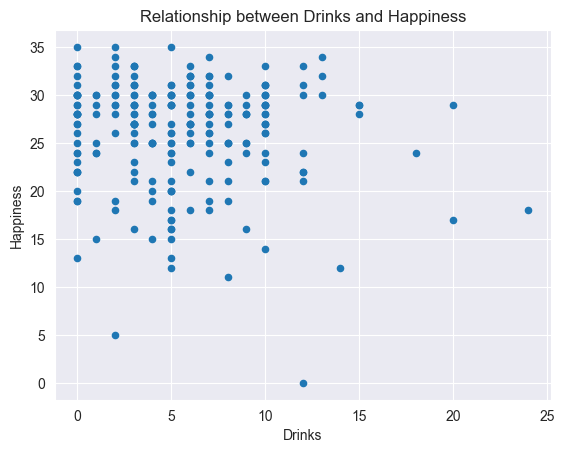

In [34]:
# prints a scatter plot of happiness and drinks
df.plot.scatter(x='Drinks', y= 'Happiness', title = "Relationship between Drinks and Happiness")

<Axes: title={'center': 'Relationship between Drinks and DepressionScore'}, xlabel='Drinks', ylabel='DepressionScore'>

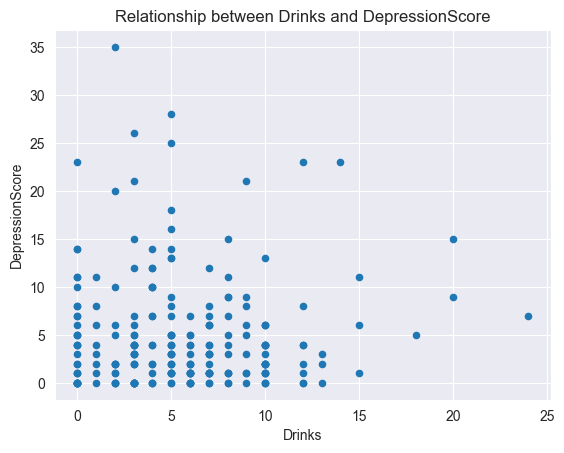

In [35]:
# prints a scatter plot of the drinks and depression score 
df.plot.scatter(x='Drinks', y= 'DepressionScore', title = "Relationship between Drinks and DepressionScore")

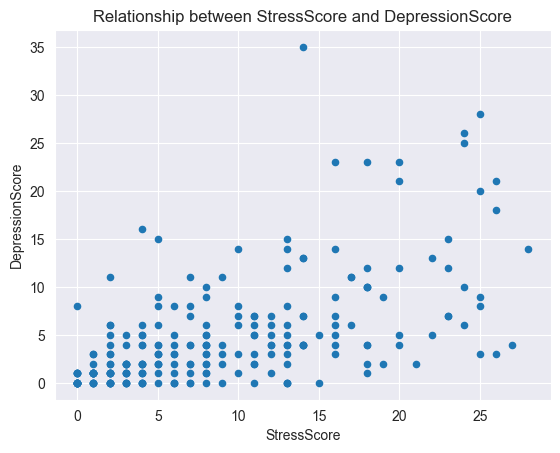

In [36]:
# prints a scatter plot of the stress score and depression score
df.plot.scatter(x='StressScore', y='DepressionScore').set(title= 'Relationship between StressScore and DepressionScore')
plt.show()

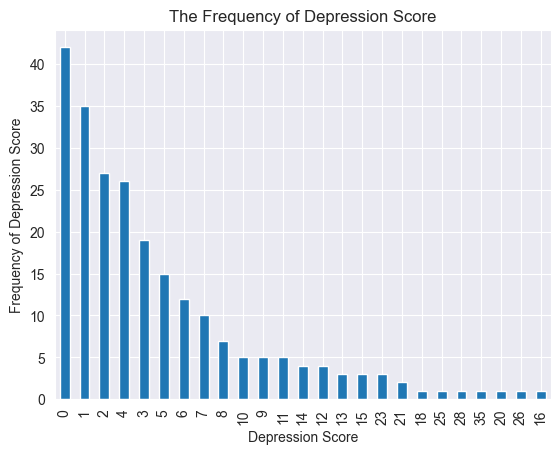

In [37]:
# counts the total number of each depression score in the dataset
df['DepressionScore'].value_counts().plot(kind='bar', xlabel = 'Depression Score', ylabel = 'Frequency of Depression Score', title = 'The Frequency of Depression Score')
#xlabel = 'Depression Score Count'
ylabel = 'Total number of people with that specific depression score'

<Axes: title={'center': 'The Frequency of Stress Score'}, xlabel='Stress Score', ylabel='Frequency of Stress Score'>

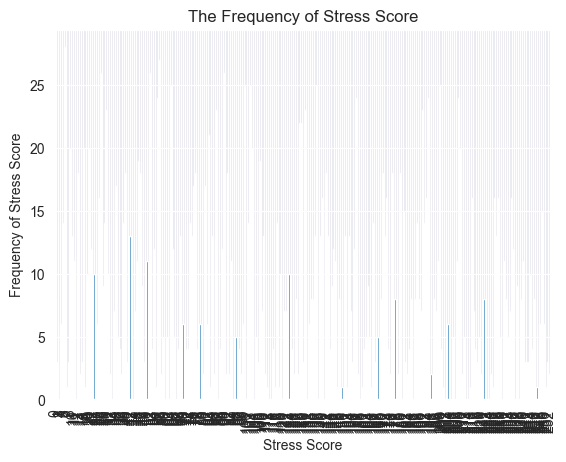

In [38]:
# counts the total number of each depression score in the dataset
orderedValues = df['StressScore'].sort_index()
orderedValues.plot(kind='bar', xlabel = 'Stress Score', ylabel = 'Frequency of Stress Score', title = 'The Frequency of Stress Score')




<Axes: title={'center': 'Relationship between Depression and Stress'}, xlabel='DepressionScore', ylabel='StressScore'>

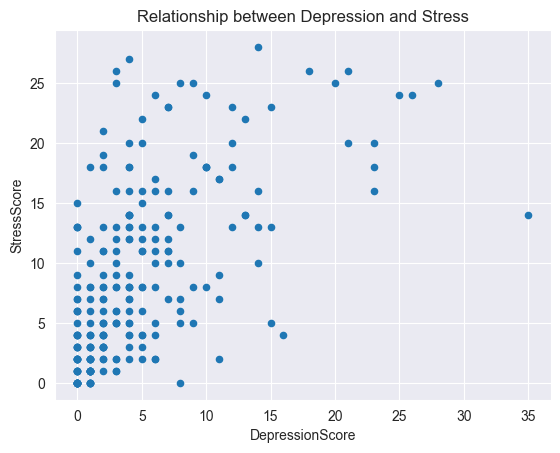

In [39]:
# prints a scatter plot of the stress score and depression score

df.plot.scatter(x='DepressionScore', y= 'StressScore', title= "Relationship between Depression and Stress")

<Axes: title={'center': 'Relationship between PoorSleepQuality and DepressionScore'}, xlabel='DepressionScore', ylabel='PoorSleepQuality'>

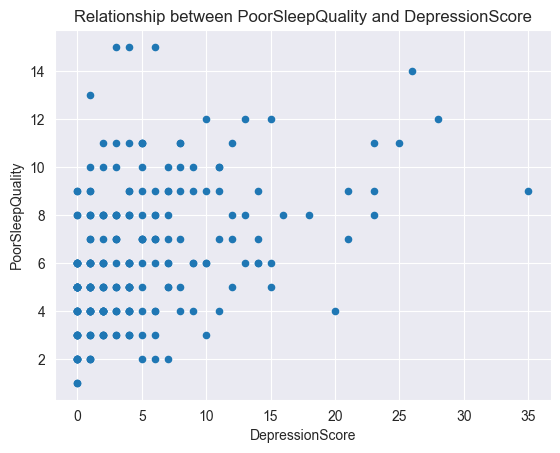

In [40]:
# prints a scatter plot of the depression score and poor sleep quality score
df.plot.scatter(x='DepressionScore', y= 'PoorSleepQuality', title = "Relationship between PoorSleepQuality and DepressionScore")

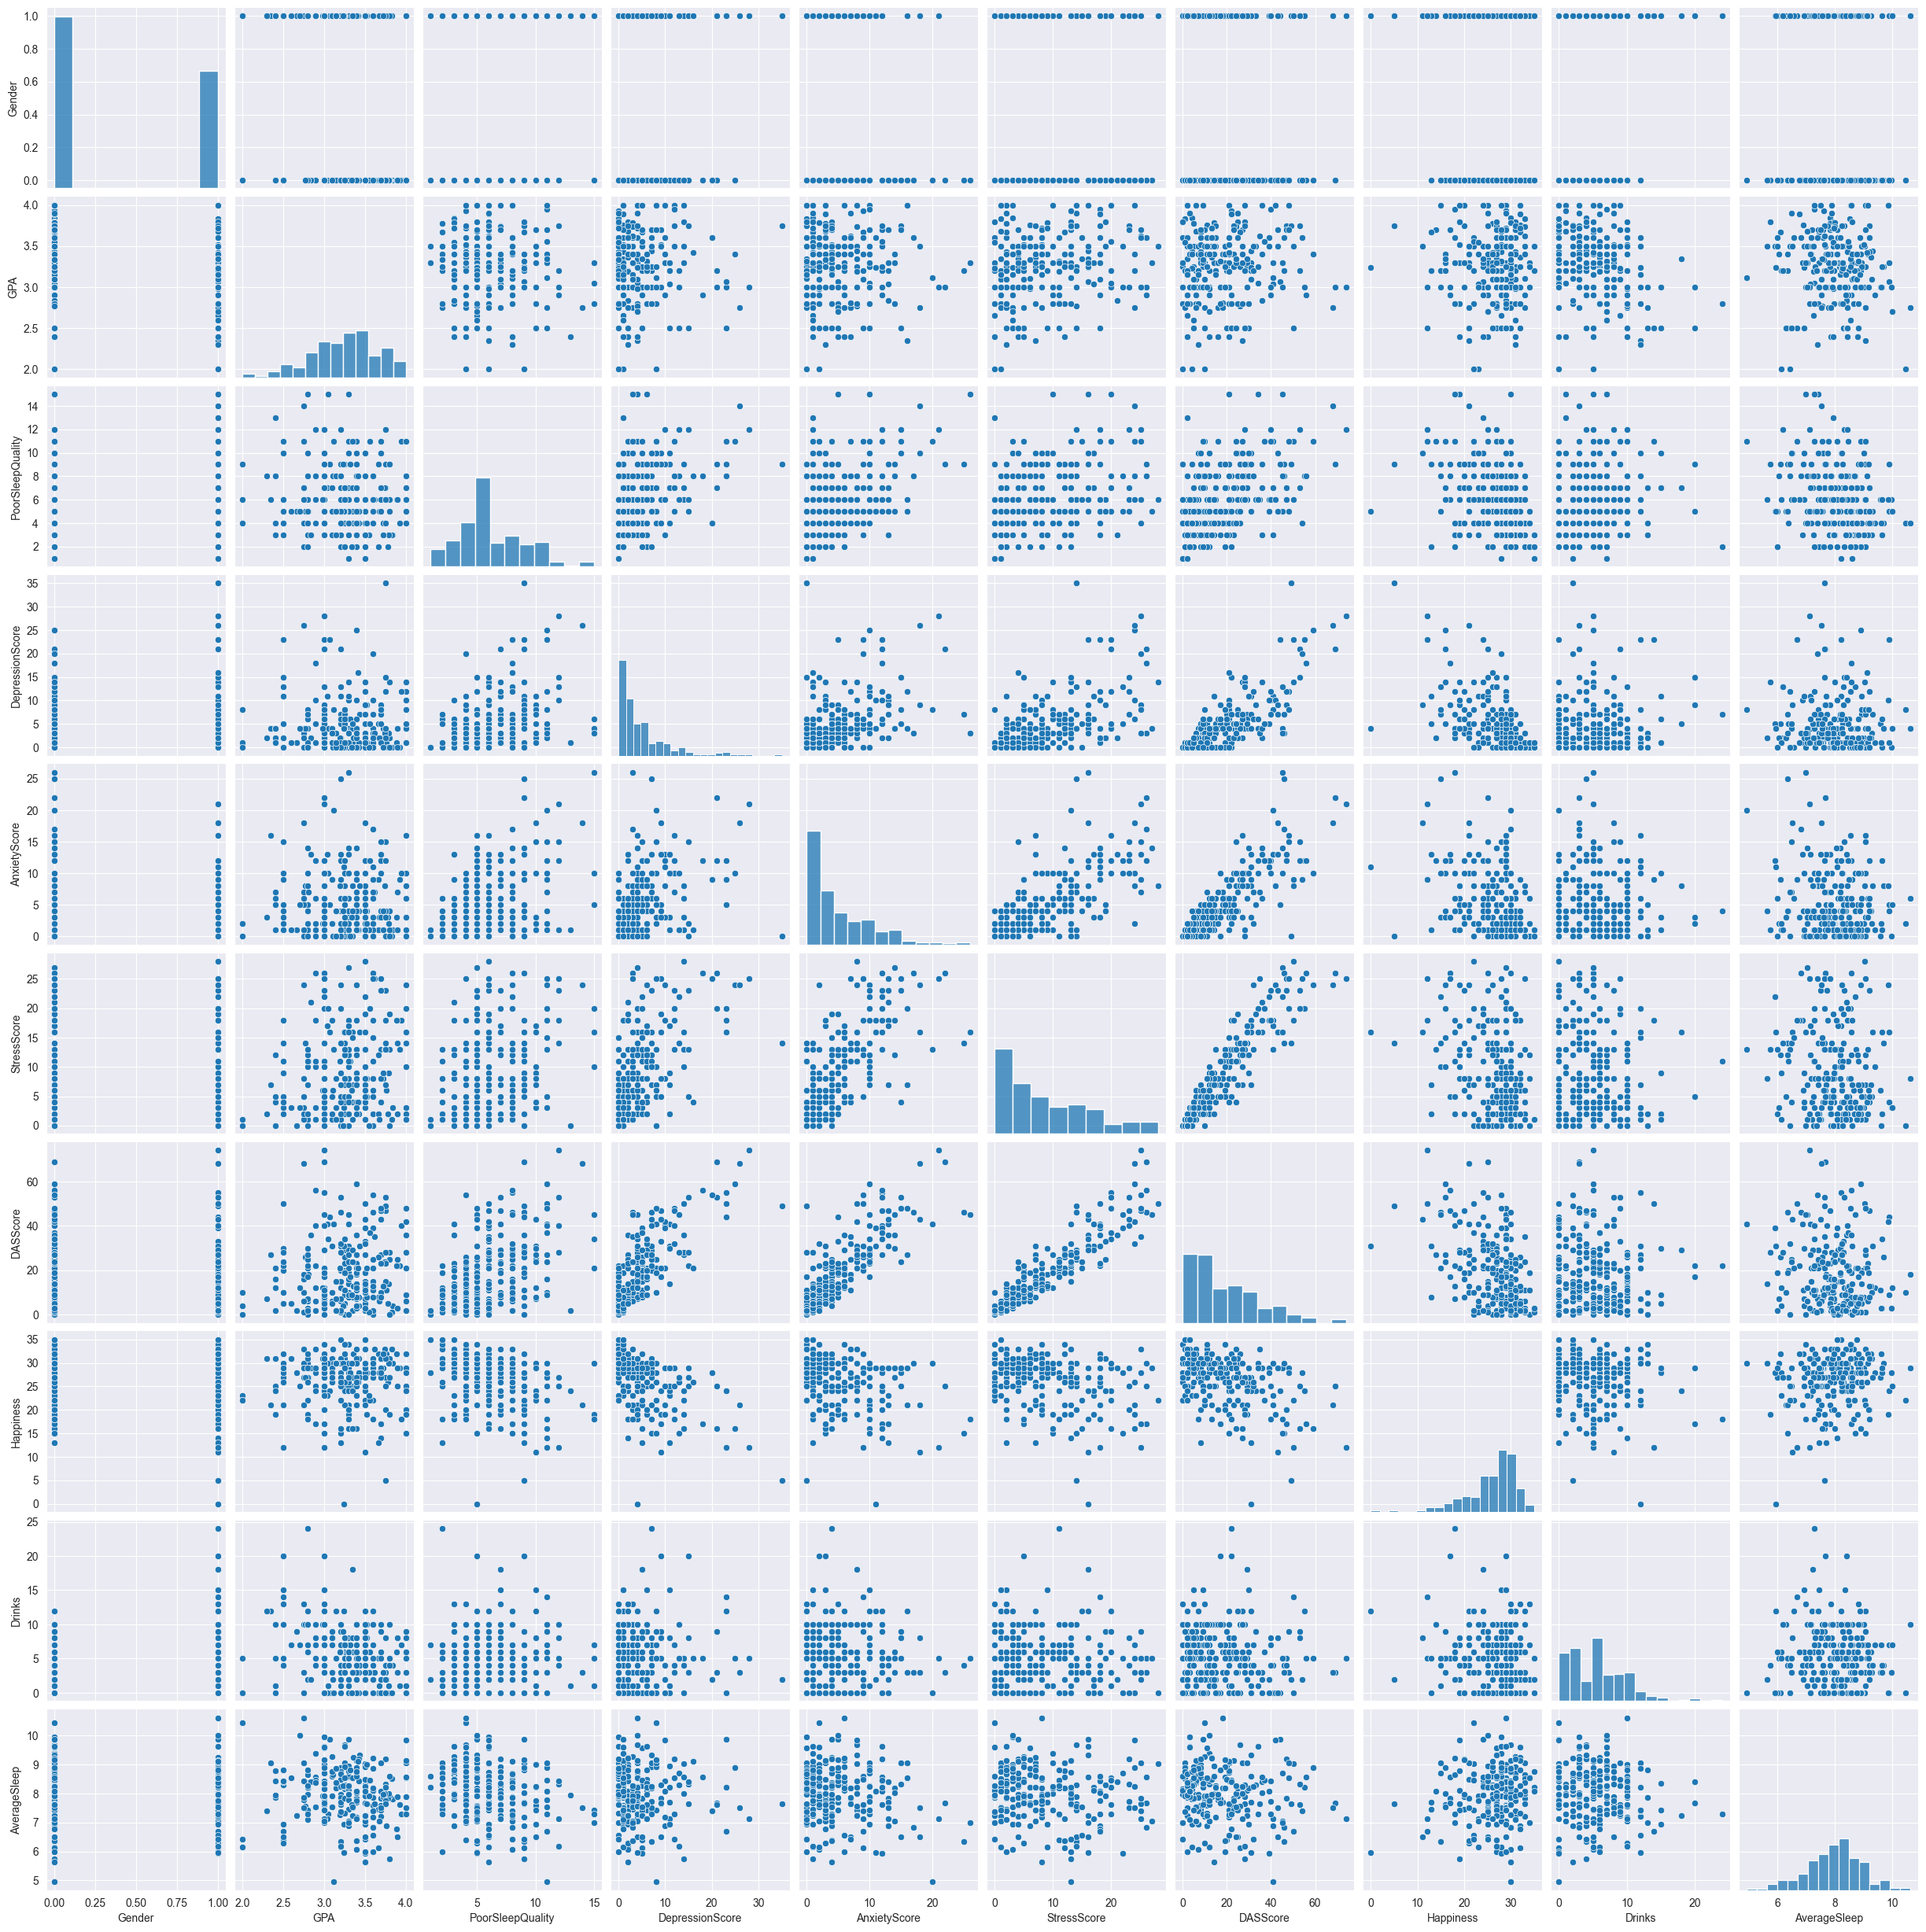

In [41]:
# prints the pairplot which shows the relationship between different variables in the dataset
sns.pairplot(df)

<Axes: >

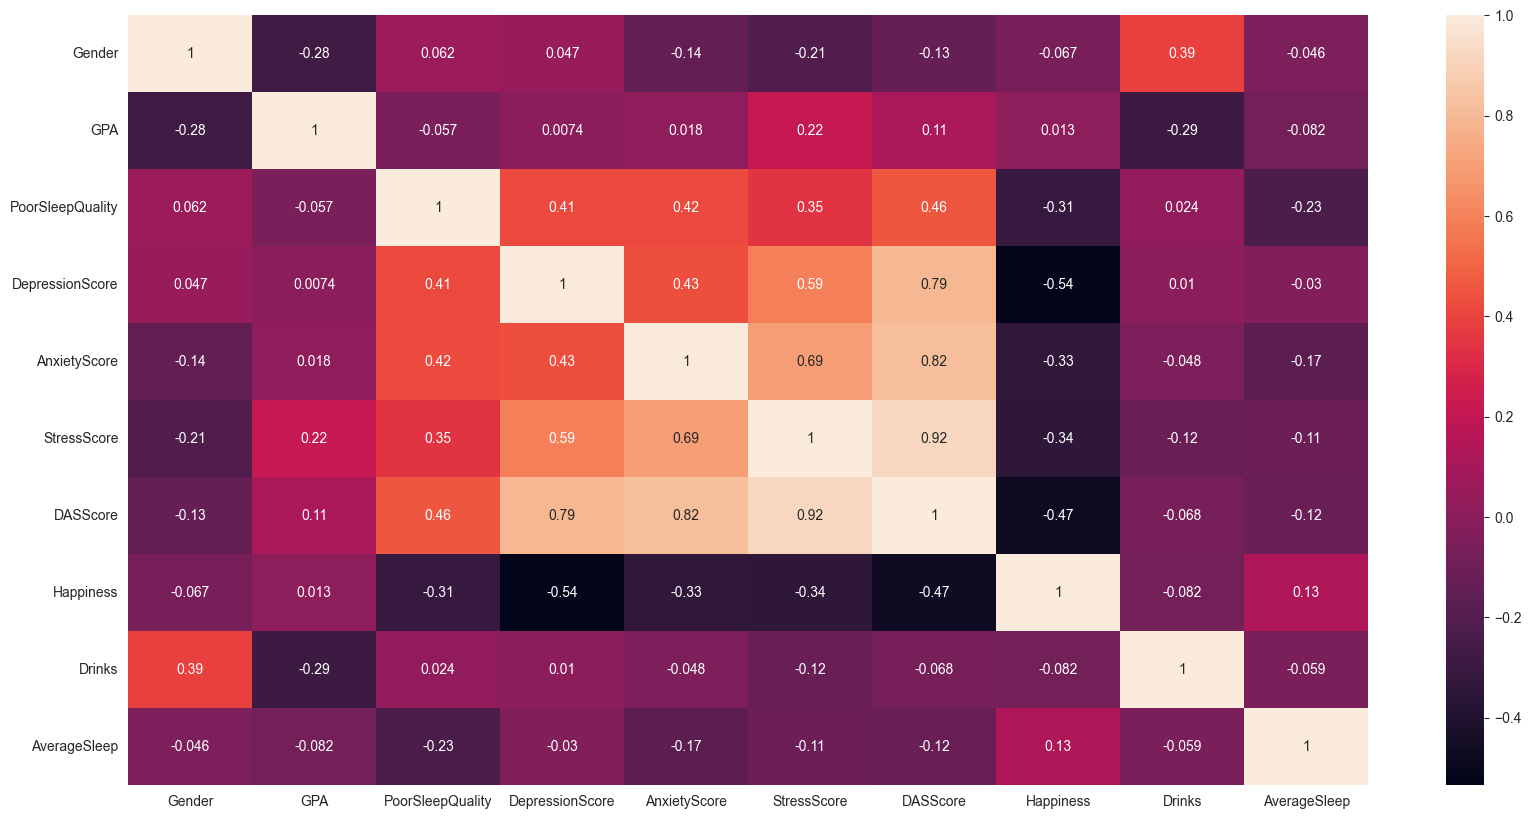

In [42]:
# displays the heatmap 
fig, ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

## KNN Machine Learning Algorithm

In [43]:
# represents the train split 
X   = df[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']] #get the input features
y   = df['DepressionScore']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7     
                                                   )

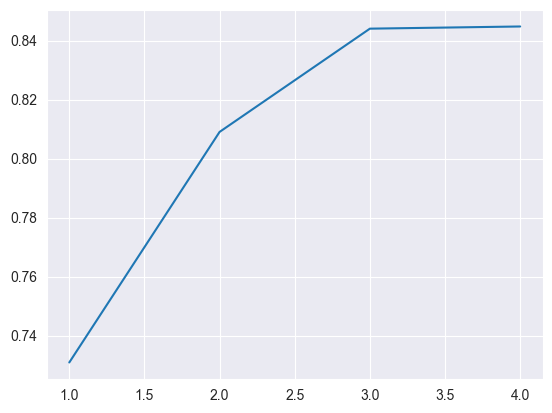

In [44]:
# represents an empty list of predictions

prediction = {}

for k in range(1, 5): #represents a range of at least 5 different values of k
    knn = KNeighborsRegressor(n_neighbors = k) #initialize classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    prediction[k] = knn.score(X_test, y_test)
    
sns.lineplot(x=prediction.keys(), y=prediction.values())
plt.show()

In [45]:
# sets up the parameter grid
params = {'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'p': [1,2]}

# initializes the KNeightbor Regression 

knn_2 = KNeighborsRegressor()

#initialize Grid Search with Cross Validation
knn_2_grid = GridSearchCV(estimator = knn_2, param_grid = params, cv=10)
knn_2_grid.fit(X_train, y_train)

print(knn_2_grid.best_params_) #print the best parameters
print(knn_2_grid.best_score_)  #print the best score

{'algorithm': 'auto', 'p': 2, 'weights': 'distance'}
0.7772615489128532


In [46]:
# represents the knn regressor
knn = KNeighborsRegressor(n_neighbors = 4, weights= 'distance', algorithm='ball_tree', p = 2) #initialize the regressor 


knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=4, weights='distance')

In [47]:
#predict the labels for the test set
y_pred_knn   = knn.predict(X_test)

print('The predicted Depression Score is: {}'.format(y_pred_knn))

The predicted Depression Score is: [ 0.78471121  0.65661116  0.          2.64121134  8.73709709  1.7220737
  0.          2.69423827  0.47340137  0.85871947  2.78207076  3.58836469
 11.34396014  4.5319126  17.20736448  2.04761579  1.          7.06545533
  8.86082043  0.25        6.35533482  2.05202199  3.30949418  6.63466822
  2.2451229   2.20060373  7.67148306  1.73668018  4.09881998  0.47340137
  5.21742619  5.47063616  1.2881364   0.77345908  4.72185656  1.56503548
  1.57212246  7.72824557  6.94005268  7.41900991  0.30628706  8.13679992
  4.57419072  2.19828067  7.05352165  0.85702898  1.53495778 21.43551746
  2.31893195  2.          1.58373839  0.97806376  0.73019993  4.97621668
  0.26975214  9.68945963  2.76340571  9.03846009 12.45652667  2.12239793
  6.80785378  9.79852131  5.68063283  5.38165731  0.40348647  4.46635984
  0.92155651  1.5         4.80861503 10.28666387  6.01191383]


In [48]:
# represents the mean absolute error
mae = mean_absolute_error(y_test, y_pred_knn)
# prints the mean absolute error 
print('The mae of the model is: {}'.format(mae))

The mae of the model is: 1.2768722139861148


In [49]:
# represents the r^2 score
r_2_score = r2_score(y_test, y_pred_knn)
# prints the r^2 score
print('The r_2_score of the model is: {}' .format(r_2_score))

The r_2_score of the model is: 0.859730993562436


## Random Forest Regression Algorithm

In [50]:
# initializes the Random Forest Regressor
rf = RandomForestRegressor(random_state=7, n_estimators=200, max_depth = 30)
# fits the data 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=200, random_state=7)

In [51]:
#predict the labels for the test set
y_pred_rf   = rf.predict(X_test)
print('The predicted Depression Score is: {}'.format(y_pred_rf))

The predicted Depression Score is: [4.5000e-01 2.4500e-01 2.0000e-02 2.9650e+00 1.1970e+01 2.2950e+00
 2.5000e-02 1.6500e+00 5.1000e-01 3.9000e-01 2.2750e+00 3.7350e+00
 1.3310e+01 4.2150e+00 2.4145e+01 2.1200e+00 1.9950e+00 8.6050e+00
 9.9750e+00 2.1000e-01 7.1550e+00 3.4300e+00 2.7100e+00 5.4450e+00
 2.8050e+00 3.7250e+00 8.3800e+00 2.7000e+00 3.8300e+00 5.1000e-01
 5.9700e+00 5.0450e+00 1.1750e+00 5.5000e-01 5.7350e+00 2.2800e+00
 1.5350e+00 7.6300e+00 5.9000e+00 8.3750e+00 4.5000e-01 1.1745e+01
 4.5950e+00 2.6150e+00 8.7900e+00 5.9000e-01 1.9750e+00 2.0500e+01
 2.4900e+00 3.0650e+00 2.7200e+00 6.1500e-01 6.0000e-01 3.0150e+00
 6.2000e-01 9.6250e+00 2.8850e+00 1.0025e+01 1.3935e+01 1.5900e+00
 7.8800e+00 9.4950e+00 4.7150e+00 4.5150e+00 3.3000e-01 3.8300e+00
 6.0500e-01 1.4250e+00 3.8850e+00 1.0255e+01 5.7350e+00]


In [52]:
# sets up the parameter grid
params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}
          #'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    
# initializes the random forest regression     

rf = RandomForestRegressor()

#initialize Grid Search with Cross Validation
rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv=10)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_) #print the best parameters
print(rf_grid.best_score_)  #print the best score



{'max_depth': 20}
0.7620764189072083


In [53]:
# represents the mean absolute error 
mae = mean_absolute_error(y_test, y_pred_rf)

# prints the mean absolute error 
print('The mae of the model is: {}'.format(mae))

The mae of the model is: 1.5090845070422534


In [54]:
# represents the r^2 score 
r_2_score = r2_score(y_test, y_pred_rf)

#prints the r^2 score 
print('The r_2_score of the model is: {}' .format(r_2_score))

The r_2_score of the model is: 0.7363381240869429


## Support Vector Machine Algorithm

In [55]:
X_train = X_train.copy()
X_test  = X_test.copy()

In [56]:
#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']])

X_train[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']] = scaler.transform(X_train[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']]) #scale the training data

In [57]:
#setup the parameter grid with values of C ranging from 1 to 10 and gamma ranging from 1 to 5 
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

regressor = SVR(kernel='rbf')

#initialize Grid Search with Cross Validation
regressor_grid = GridSearchCV(estimator = regressor, param_grid = params, cv=10)
regressor_grid.fit(X_train, y_train)

print(regressor_grid.best_params_) #print the best parameters
print(regressor_grid.best_score_)  #print the best scor

{'C': 9, 'gamma': 1}
0.7668913894103063


In [58]:
#initialize the regressor

regressor = SVR(kernel='rbf', C = 9)
regressor.fit(X_train,y_train)


SVR(C=9)

In [59]:
#encode and scales the test data
X_test[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']] = scaler.transform(X_test[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']]) #scale the test data
#predict the labels for the test set
print(X_test)
y_pred_svr  = regressor.predict(X_test)

print('The predicted DepressionScore is: {}'.format(y_pred_svr))

     PoorSleepQuality  AnxietyScore  StressScore  DASScore
155         -0.833070     -1.041801    -0.816417 -0.959738
90          -1.201065     -0.829534    -0.947397 -1.022163
94          -0.833070     -1.041801    -1.209358 -1.209439
216         -0.097079     -0.192733    -0.292496 -0.273062
4            1.006908      4.264872     0.624366  1.662117
..                ...           ...          ...       ...
161         -1.569061     -0.192733    -0.685437 -0.710038
111         -1.569061     -0.405000    -0.947397 -0.897313
187         -0.465074      0.656335     0.624366  0.413614
34           0.270917      1.717669     1.017307  1.349991
72           0.638912      1.080868     0.624366  0.538465

[71 rows x 4 columns]
The predicted DepressionScore is: [ 0.97961194  0.08246347  0.11061972  4.05105135 10.12304486  1.03571147
  0.2600761   2.87281845  0.0895355   0.94568105  1.31613731 -0.08645511
 10.30032031  7.27066427 17.30824485  2.04163517  1.97920555  9.89726884
  9.70701083  0.

In [60]:
#encode and scale the test data
X_test[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']] = scaler.transform(X_test[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']]) #scale the test data
#predict the labels for the test set
#print(X_test)
y_pred_svr_X_Values  = regressor.predict(scaler.transform([[23, 26, 34, 27]]))

print('The predicted DepressionScore is: {}'.format(y_pred_svr_X_Values))



The predicted DepressionScore is: [8.90357388]


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [61]:
scaler.transform([[23, 26, 34, 27]])

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[6.15884524, 4.47713943, 3.24397175, 0.47603938]])

In [62]:
# puts the new data into a dataframe 
X_values = pd.DataFrame([[23, 26, 34, 27], [10, 8, 16, 26]], columns = ['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore'])

# scales the X_values
X_values[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']] = scaler.transform(X_values[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']])

y_pred_x_values = regressor.predict(X_values)
print('The predicted DepressionScore is: {}'.format(y_pred_x_values))



The predicted DepressionScore is: [8.90357388 2.6760024 ]


In [63]:
# prints the specific x values after transforming the data
X_values.head()

,PoorSleepQuality,AnxietyScore,StressScore,DASScore
0,6.158845,4.477139,3.243972,0.476039
1,1.374904,0.656335,0.886327,0.413614


In [64]:
#transforms the new X_values
scaler.transform(X_values[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']])

array([[-0.03862423, -0.09145225, -0.78446148, -1.17972194],
       [-1.79909336, -0.90248278, -1.09326649, -1.18361884]])

In [65]:
# represents the mean absolute error 
mae = mean_absolute_error(y_test, y_pred_svr)
# prints the mean absolute error
print('The mae of the model is: {}'.format(mae))

The mae of the model is: 0.5966522271360469


In [66]:
# r-squared - test regression model - curve fits to given data form 

r_2_score = r2_score(y_test, y_pred_svr)
print('The r_2_score of the model is: {}' .format(r_2_score))

The r_2_score of the model is: 0.9167191370500041


In [68]:
#### PREDICT YOUR DEPRESSION LEVEL HERE: ####
# Higher numbers indicate worse levels.
pickle.dump(regressor, open('mod.pkl', 'wb'))
def predictor():
    slp = int(input("How poor is your sleep from 1(least) to 20(most)"))
    anx = int(input("How anxious are you from 1(least) to 25(most)"))
    stress = int(input ("How stressed are you from 1(least) to 25(most)"))
    DAS = (anx + stress) * 4/3
    X_values = pd.DataFrame([[slp, anx, stress, DAS]], columns = ['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore'])

    #scales the X_values
    X_values[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']] = scaler.transform(X_values[['PoorSleepQuality', 'AnxietyScore', 'StressScore', 'DASScore']])

    #Use the SVM model.
    y_pred_x_values = regressor.predict(X_values)
    # return int(y_pred_x_values[0])
    return y_pred_x_values


Your predicted DepressionScore is: 6 , with 15 being the highest value.
